In [1]:
import pandas_datareader as web
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf

Gathering data from listed securities from the beginning of 2020 to now and inputing into a pandas DataFrame

In [45]:
start = dt.datetime(2020,1,1)
end = dt.datetime.now()

tickers = ["AAPL", "TSLA", "AMZN", "JPM", "KO"]

all_data = pd.DataFrame()

for ticker in tickers:
    
    data = yf.download(ticker,start=start,end=end)
    monthly_data = data['Adj Close'].resample('M').last()
    df = pd.DataFrame({'Date': monthly_data.index, f'{ticker}_adj_close': monthly_data.values})
    
    if all_data.empty:
        all_data = df
    else:
        all_data = pd.merge(all_data, df, on='Date', how='outer')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Using the all data DataFrame and turning the end of month stock prices into percent change

In [46]:
pct_change = pd.DataFrame()
#Finding the percent change by month for each security
for ticker in tickers:
    col_name = f'{ticker}'
    pct_change[col_name] = all_data[f'{ticker}_adj_close'].pct_change()
    
pct_change['Date'] = all_data['Date']
pct_change.set_index('Date', inplace=True)


Creating a graph based on percent change

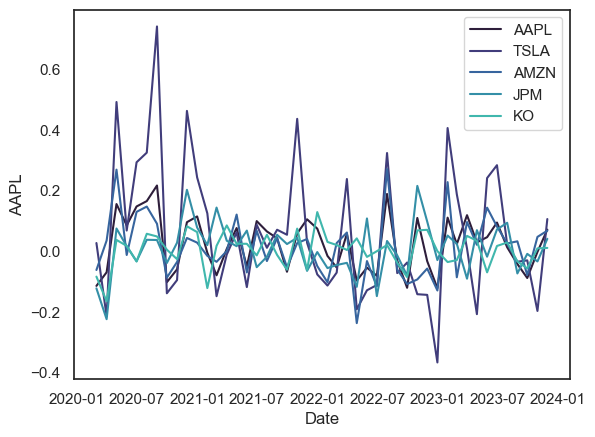

In [54]:
sns.set(style='white')
sns.set_palette('mako')

for ticker in tickers:
    col_name = f'{ticker}'
    sns.lineplot(data=pct_change, x=pct_change.index, y=col_name, label=ticker)

Creating a graph based on the cumulative percent changes

Text(0.5, 1.0, 'Cumulative Percentage Change Over Time')

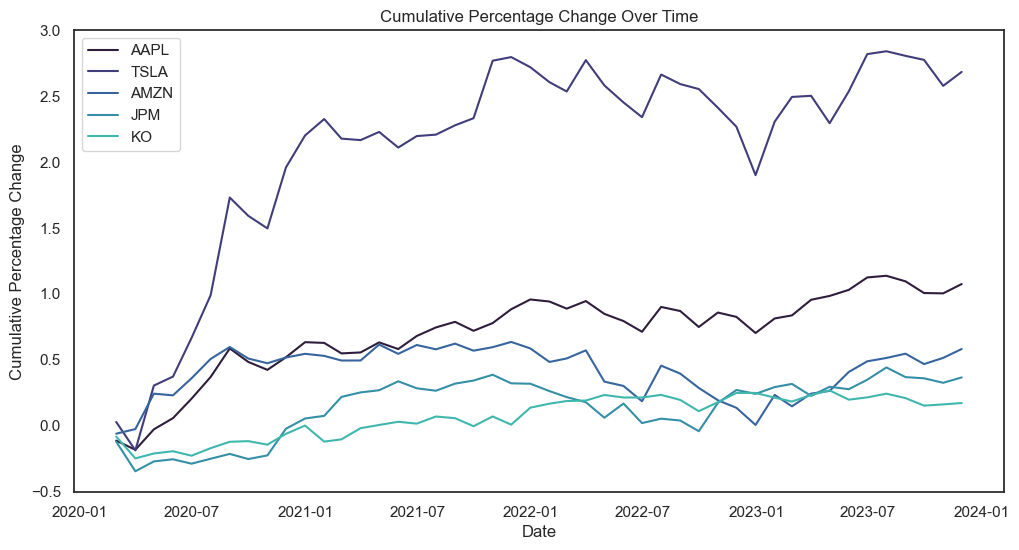

In [55]:
# Calculate the cumulative sum for each column
cumulative_sum = pct_change.cumsum()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the cumulative sum of percentage changes
for ticker in tickers:
    col_name = f'{ticker}'
    sns.lineplot(data=cumulative_sum[col_name], label=ticker)

# Changing legend location, labels, and title
ax.legend(loc='upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Percentage Change')
ax.set_title('Cumulative Percentage Change Over Time')

Creating a heat map to analyze correlation between securities

<AxesSubplot:>

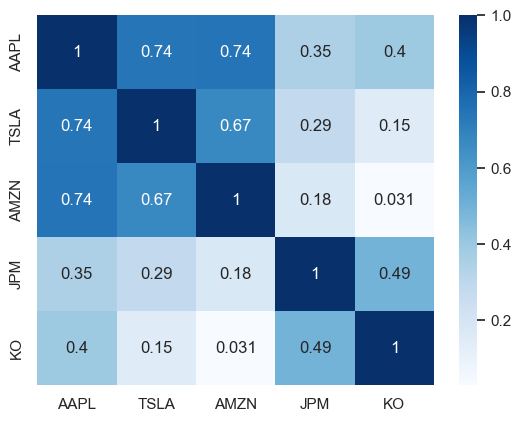

In [57]:
# Using MatPlotLib correlation
corr_data = pct_change.corr(method = 'pearson')

sns.heatmap(corr_data, annot=True, cmap="Blues")